# Pips necesarios



In [1]:
!pip install numpy qiskit qiskit-aer
!pip install pylatexenc


# Librerias

In [2]:
import numpy as np
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

# QFT optimizada y visualización de sus rotaciones y del circuito completo

Aplicando CP(3.141592653589793) de qubit 0 a 1
Subcircuito 0: Aplicando CP(3.141592653589793) de qubit 0 a 1
Aplicando CP(3.141592653589793) de qubit 2 a 3
Subcircuito 1: Aplicando CP(3.141592653589793) de qubit 0 a 1
Aplicando CP(3.141592653589793) de qubit 3 a 4
Subcircuito 1: Aplicando CP(3.141592653589793) de qubit 1 a 2
Aplicando CP(3.141592653589793) de qubit 4 a 5
Subcircuito 1: Aplicando CP(3.141592653589793) de qubit 2 a 3
Aplicando CP(1.5707963267948966) de qubit 2 a 4
Subcircuito 1: Aplicando CP(1.5707963267948966) de qubit 0 a 2
Aplicando CP(1.5707963267948966) de qubit 3 a 5
Subcircuito 1: Aplicando CP(1.5707963267948966) de qubit 1 a 3
Aplicando CP(0.7853981633974483) de qubit 2 a 5
Subcircuito 1: Aplicando CP(0.7853981633974483) de qubit 0 a 3
Aplicando CP(3.141592653589793) de qubit 6 a 7
Subcircuito 2: Aplicando CP(3.141592653589793) de qubit 0 a 1
Aplicando CP(3.141592653589793) de qubit 8 a 9
Subcircuito 3: Aplicando CP(3.141592653589793) de qubit 0 a 1
Aplicando CP(

<ipython-input-3-2911c7178a13>:51: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for inst, qargs, _ in qft_circuit.data:
<ipython-input-3-2911c7178a13>:56: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for inst, qargs, _ in qft_subcircuits[0].data:


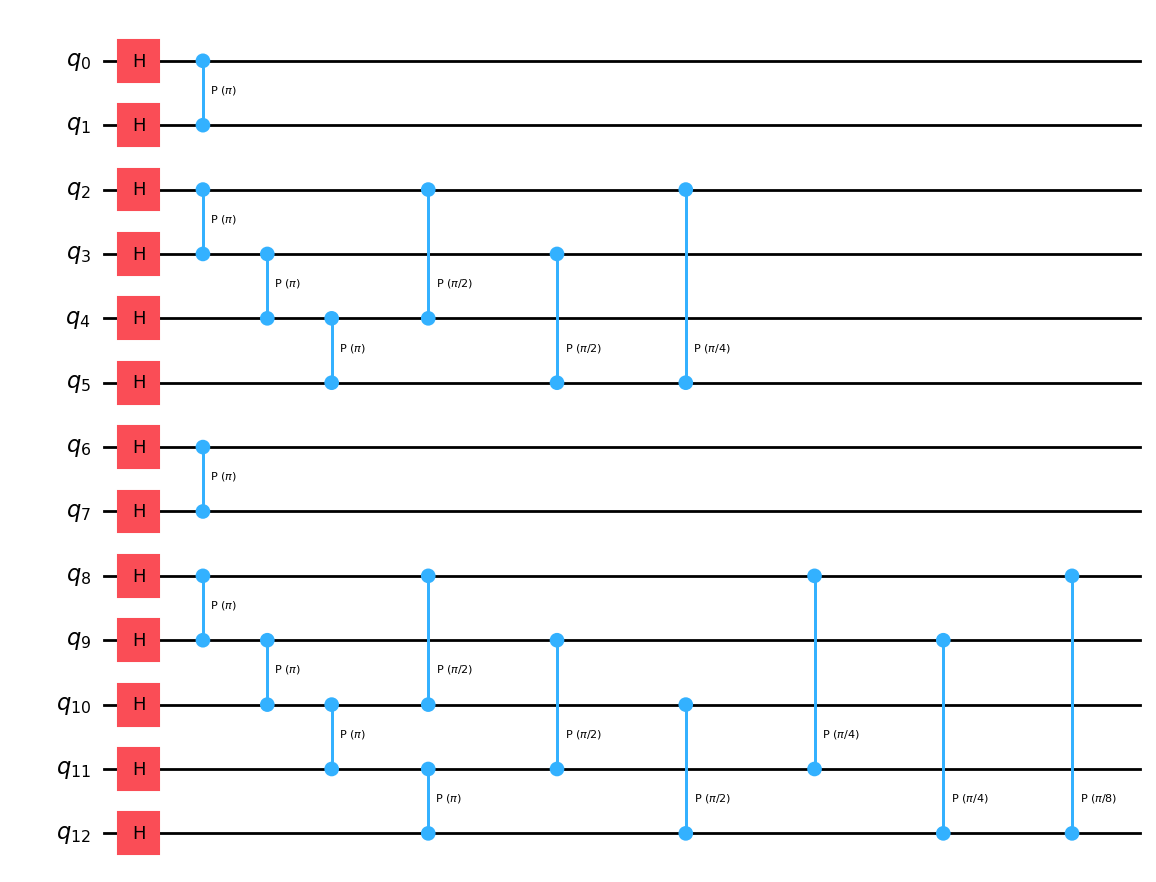

Subcircuito QFT para módulo 3:


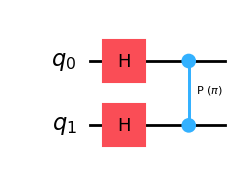

Subcircuito QFT para módulo 11:


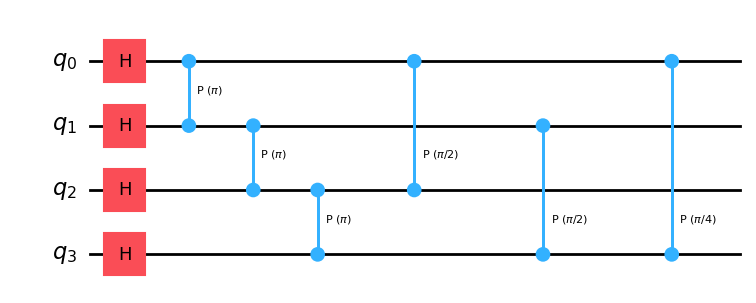

Subcircuito QFT para módulo 3:


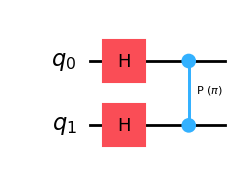

Subcircuito QFT para módulo 19:


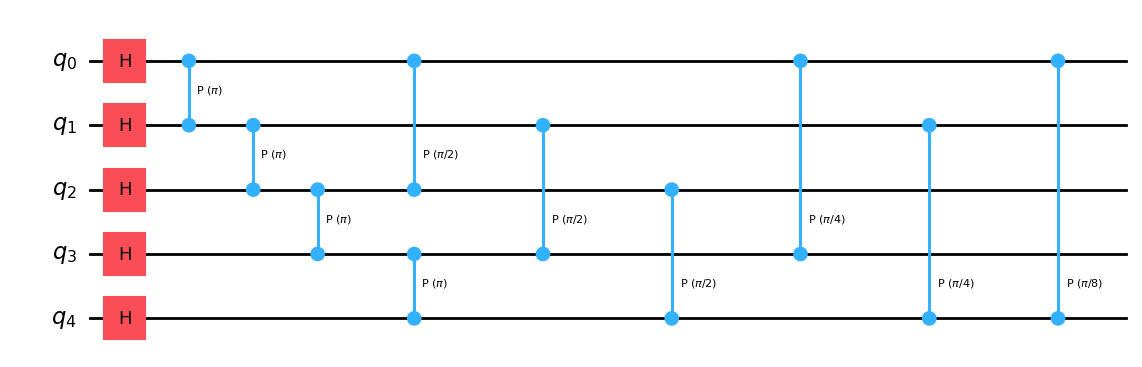

In [3]:
def qft_group_detailed(moduli):
    bits_per_factor = [math.ceil(math.log2(m)) for m in moduli]
    total_qubits = sum(bits_per_factor)
    qc = QuantumCircuit(total_qubits)

    # Para almacenar subcircuitos
    subcircuits = []

    # Aplicar Hadamard a todos los qubits
    for i in range(total_qubits):
        qc.h(i)

    # Aplicar rotaciones de fase por grupos de módulos
    qubit_offset = 0
    for idx, m in enumerate(moduli):
        n_qubits = bits_per_factor[idx]

        # Crear subcircuito para este módulo
        sub_qc = QuantumCircuit(n_qubits, name=f"QFT_mod_{m}")

        # Aplicar Hadamard en el subcircuito
        for i in range(n_qubits):
            sub_qc.h(i)

        # Aplicar rotaciones dentro de este grupo de qubits
        for layer in range(1, n_qubits):
            for i in range(n_qubits - layer):
                j = i + layer
                angle = 2 * np.pi / (2**(layer))

                # Aplicar CP en el circuito principal y verificar que se aplique
                qc.cp(angle, qubit_offset + i, qubit_offset + j)
                print(f"Aplicando CP({angle}) de qubit {qubit_offset + i} a {qubit_offset + j}")

                # Aplicar CP en el subcircuito y verificar que se aplique
                sub_qc.cp(angle, i, j)
                print(f"Subcircuito {idx}: Aplicando CP({angle}) de qubit {i} a {j}")

        subcircuits.append(sub_qc)
        qubit_offset += n_qubits

    return qc, subcircuits


# Crear un ejemplo de QFT para visualizarlo
moduli_example = (3, 11, 3, 19)  # Ejemplo con 4 qubits
qft_circuit, qft_subcircuits = qft_group_detailed(moduli_example)

# Verificar las instrucciones en el circuito principal
print("Instrucciones en el circuito principal:")
for inst, qargs, _ in qft_circuit.data:
    print(f"Instrucción: {inst.name}, qubits: {[qft_circuit.find_bit(qubit).index for qubit in qargs]}")

# Verificar las instrucciones en el primer subcircuito
print("\nInstrucciones en el primer subcircuito:")
for inst, qargs, _ in qft_subcircuits[0].data:
    print(f"Instrucción: {inst.name}, qubits: {[qft_subcircuits[0].find_bit(qubit).index for qubit in qargs]}")

# Visualizar el circuito completo
print("Circuito QFT completo:")
display(qft_circuit.draw(output='mpl', fold=20))  # El parámetro fold ayuda a mostrar circuitos grandes

# Visualizar cada subcircuito
for idx, subcircuit in enumerate(qft_subcircuits):
    print(f"Subcircuito QFT para módulo {moduli_example[idx]}:")
    display(subcircuit.draw(output='mpl'))



# Visualización de la QFT estandar de QISKIT

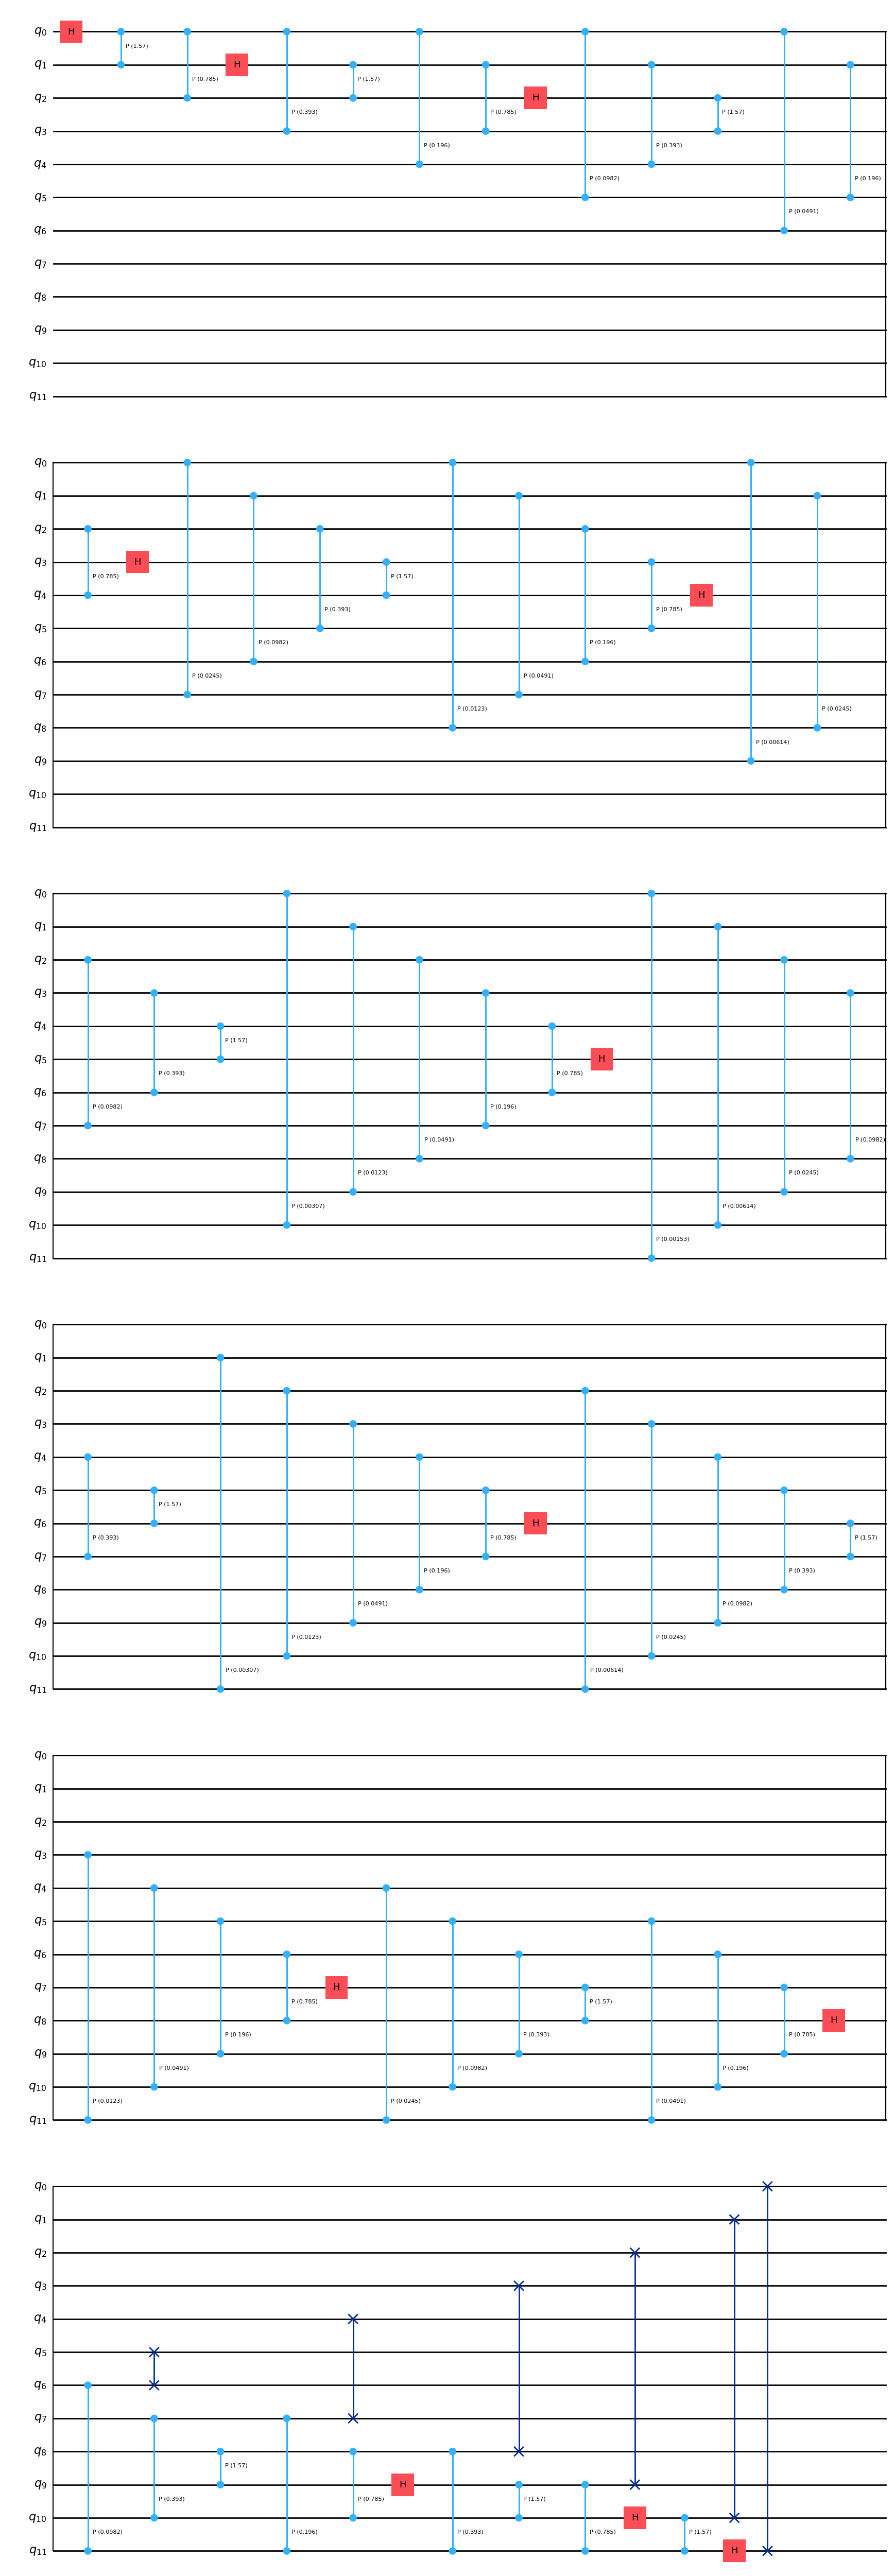

In [4]:
from qiskit import QuantumCircuit

def qft(n):
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.h(k)  # Aplica la puerta H al qubit k
        for j in range(k + 1, n):
            angle = 2 * 3.14159 / (2 ** (j - k + 1))
            qc.cp(angle, j, k)  # Aplica la puerta UROTm como una fase controlada
    for i in range(n // 2):
        qc.swap(i, n - i - 1)  # Intercambia los qubits para invertir el orden
    return qc

# Crear el circuito QFT para 4 qubits
qft_circuit = qft(12)
qft_circuit.draw('mpl')